In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [7]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:

# Load your dataset
df = pd.read_csv('/content/chatgpt_reviews.csv')


In [9]:
# Preprocessing function to clean the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])

    # Tokenization and stopwords removal
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

# Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_text)


In [10]:
# Convert the cleaned reviews into numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review']).toarray()

# Target variable: Sentiment (1 = Positive, 0 = Negative)
# You can convert ratings to sentiments (e.g., ratings 4 and 5 as Positive, 1–2 as Negative, 3 as Neutral)
df['sentiment'] = df['rating'].apply(lambda x: 1 if x > 3 else (0 if x < 3 else 2))

y = df['sentiment']


In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [13]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')


Accuracy: 0.3985
Confusion Matrix: 
[[438 383   0]
 [432 359   0]
 [206 182   0]]


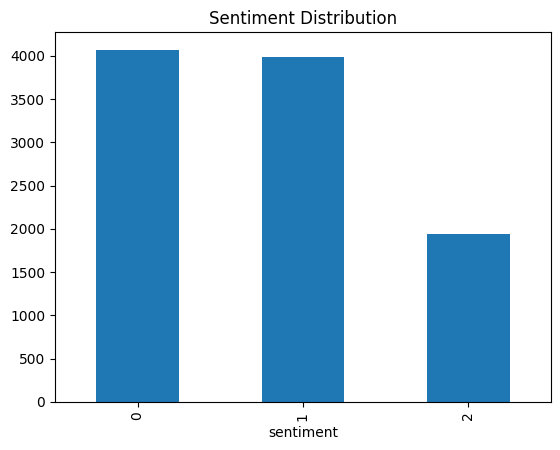

In [14]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()


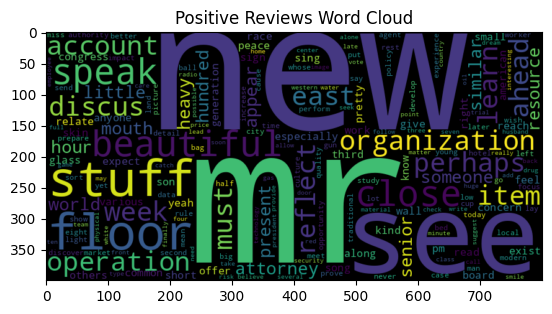

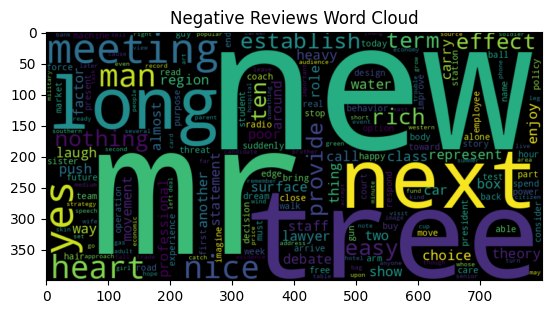

In [15]:
from wordcloud import WordCloud

# Word cloud for positive reviews
positive_reviews = ' '.join(df[df['sentiment'] == 1]['cleaned_review'])
wordcloud_pos = WordCloud(width=800, height=400).generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.show()

# Word cloud for negative reviews
negative_reviews = ' '.join(df[df['sentiment'] == 0]['cleaned_review'])
wordcloud_neg = WordCloud(width=800, height=400).generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.show()


In [16]:

data = {
    'review': [
        'I love this app, it is amazing!',
        'Very bad, the app keeps crashing.',
        'It works fine, but needs some improvements.',
        'Best app ever! Highly recommend it!',
        'I am not happy with the features, quite slow.'
    ],
    'rating': [5, 1, 3, 5, 2]  # ratings 1-5
}

df = pd.DataFrame(data)

# Preprocess the reviews
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # convert to lowercase
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])  # remove punctuation
    words = text.split()  # tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # remove stopwords and lemmatize
    return ' '.join(words)

df['cleaned_review'] = df['review'].apply(preprocess_text)

#  Convert text into numerical data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review']).toarray()

# Convert ratings to sentiment: 1-2 as Negative, 4-5 as Positive, 3 as Neutral
df['sentiment'] = df['rating'].apply(lambda x: 1 if x > 3 else (0 if x < 3 else 2))
y = df['sentiment']

# Train the model (Naive Bayes classifier)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

#  Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')

#  Test with custom text

# Function to predict sentiment of custom text
def predict_sentiment(custom_text):
    # Preprocess the custom text
    cleaned_text = preprocess_text(custom_text)

    # Convert the text into features using the same TF-IDF vectorizer
    text_vector = tfidf.transform([cleaned_text]).toarray()

    # Predict sentiment using the trained model
    prediction = model.predict(text_vector)

    sentiment = ['Negative', 'Positive', 'Neutral']

    return sentiment[prediction[0]]

# Example: Test with custom review text
custom_review = "I think the app is great but has some room for improvement."
predicted_sentiment = predict_sentiment(custom_review)
print(f"The sentiment of the review: {predicted_sentiment}")


Accuracy: 0.0
Confusion Matrix: 
[[0 1]
 [0 0]]
The sentiment of the review: Positive
